In [2]:

import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 


In [3]:
data = pd.read_csv("Creditcard_data.csv")
data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0
769,579,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,-0.037631,...,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,5.98,0
770,580,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,0.657565,...,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,12.36,0


<Axes: xlabel='Class', ylabel='count'>

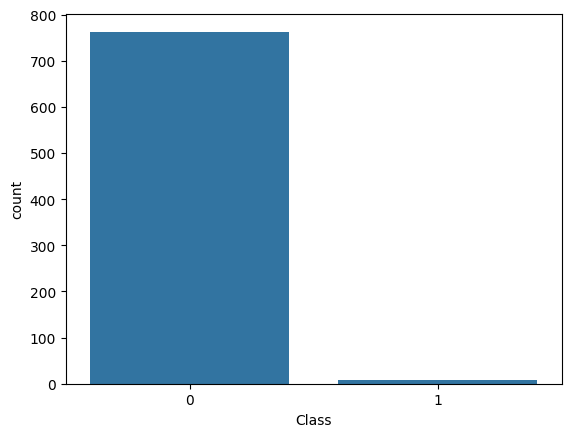

In [4]:
import seaborn as sns
sns.countplot(x='Class',data=data)

In [5]:
n=(1.96*1.96*0.5*0.5)/(0.05*0.05)
n
#total rows required in 1 sample = 384
# for 5 samples total rows required = 1920


384.1599999999999

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,259,-0.363608,1.104008,1.300678,0.070314,0.075180,-1.010396,0.683396,-0.073378,-0.401866,...,-0.261158,-0.685436,-0.013662,0.336313,-0.157577,0.071699,0.245539,0.099037,0.99,0
1,41,0.986063,-0.202965,-0.492768,0.407691,0.305660,-0.230529,0.585028,-0.208225,-0.247503,...,-0.305874,-1.216555,-0.077602,-0.741341,0.286881,0.200347,-0.075203,0.027271,169.05,0
2,417,-0.473731,0.697340,2.279600,1.359875,0.342429,1.392886,0.289971,0.170677,0.578966,...,-0.462425,-0.486810,-0.235667,-0.726568,0.085981,-0.351095,0.289067,-0.043030,8.61,0
3,259,1.095067,-0.014393,1.408552,1.266546,-0.944751,0.029578,-0.598515,0.175291,0.485231,...,0.013107,0.248009,-0.002564,0.570100,0.387137,-0.442319,0.074531,0.032215,9.99,0
4,525,-0.755011,-0.517761,1.760091,-0.654206,-0.039143,-0.492847,-0.047345,0.118936,0.734444,...,-0.049608,-0.200904,0.268931,0.108087,-0.468660,0.729549,-0.017462,0.077163,79.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
1916,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
1917,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
1918,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1


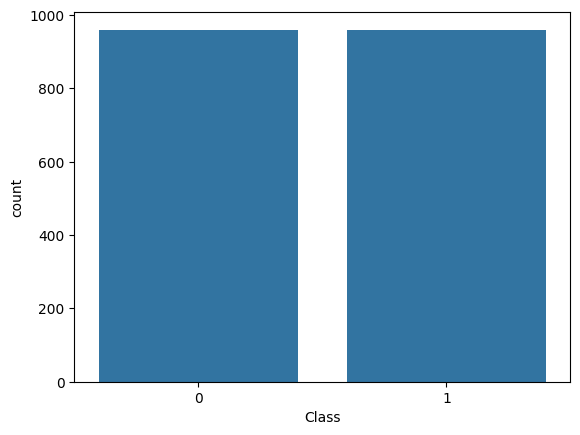

In [6]:
X = data.drop(columns=["Class"])
y = data["Class"]

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate the class distribution in the original data
desired_rows_class_0 = 960
desired_rows_class_1 = 960

# Calculate the sampling strategy
sampling_strategy = {0: desired_rows_class_0, 1: desired_rows_class_1}

# Oversample the minority class to achieve the desired number of rows for both classes
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Create a DataFrame from the resampled data
resampled_data = pd.DataFrame(X_train_resampled, columns=X_train.columns)
resampled_data["Class"] = y_train_resampled

# Plot the count of classes in the resampled data
sns.countplot(x='Class', data=resampled_data)

# Display the resampled data
resampled_data


In [7]:

def fitAndPredict(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    return accuracy_score(y_val, prediction)

In [8]:

def run_models_and_create_matrix(sample_data):
    X = sample_data.drop(columns=["Class"])
    y = sample_data["Class"]
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [LogisticRegression(solver='liblinear', random_state=42),
              GaussianNB(),
              KNeighborsClassifier(),
              SGDClassifier(),
              SVC()]

    accuracy_matrix = pd.DataFrame(index=['LogisticRegression','GaussianNB','KNeighborsClassifier','SGDClassifier','SVC'], 
                                   columns=['Sampling'])

    for i, model in enumerate(models):
        accuracy = fitAndPredict(model, X_train, y_train, X_val, y_val)
        accuracy_matrix.iloc[i, 0] = round(accuracy * 100, 2)

    return accuracy_matrix

In [9]:
common_matrix = pd.DataFrame(index=['LogisticRegression','GaussianNB','KNeighborsClassifier','SGDClassifier','SVC'], 
                             columns=['Random', 'Systematic', 'Cross-val', 'Stratified', 'Bootstrap'])

In [10]:
# Sample 1 -- Simple Random Sampling
random_sample = resampled_data.sample(n=384)
common_matrix['Random'] = run_models_and_create_matrix(random_sample)['Sampling']

# Sample 2 -- Systematic Sampling
sys_sample_df = resampled_data.iloc[::5]
common_matrix['Systematic'] = run_models_and_create_matrix(sys_sample_df)['Sampling']

# Sample 3
common_matrix['Cross-val'] = run_models_and_create_matrix(resampled_data)['Sampling']

# Sample 4 -- Stratified sampling
str_sample = resampled_data.groupby('Class', group_keys=False).apply(lambda x: x.sample(192))
common_matrix['Stratified'] = run_models_and_create_matrix(str_sample)['Sampling']

#Sample 5 -- Bootstrap sampling

bootstrap_sample =resampled_data.sample(n=384, replace=True)
bootstrap_sample
common_matrix['Bootstrap'] = run_models_and_create_matrix(bootstrap_sample)['Sampling']

In [11]:
common_matrix

,Random,Systematic,Cross-val,Stratified,Bootstrap
LogisticRegression,97.4,90.91,93.23,96.1,93.51
GaussianNB,72.73,67.53,83.85,75.32,93.51
KNeighborsClassifier,93.51,94.81,98.18,87.01,97.4
SGDClassifier,57.14,36.36,50.52,40.26,64.94
SVC,67.53,74.03,80.21,71.43,66.23


In [12]:
max_value = common_matrix.max().max()
max_row, max_col = common_matrix.stack().idxmax()
print("Maximum value in the matrix:", max_value)
print("Row name at max value:", max_row)
print("Column name at max value:", max_col)

Maximum value in the matrix: 98.18
Row name at max value: KNeighborsClassifier
Column name at max value: Cross-val
